# **Profit Percentage**

---



In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotly.express as px

**Import dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_2.csv", index_col=0)
backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_2.csv", index_col=0)
df=main

**Seperating features and target for use in modelling**

In [ ]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'profit_percentage'],
      dtype='object')

In [ ]:
X = df.drop('profit_percentage',axis=1)
y = df['profit_percentage']

**Splitting dataset to train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

**Encoding categorical variables**

In [ ]:
#One hot encoding for'Location_Category','Time_of_Booking' and ordinal encoding for 'Customer_Loyalty_Status','Vehicle_Type'
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

quants = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

numeric_transformer = StandardScaler()

encoder_loy = OrdinalEncoder(categories = [['Regular', 'Silver', 'Gold']])
encoder_veh = OrdinalEncoder(categories = [['Economy', 'Premium']])
nominal_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
                                        ('num',numeric_transformer,quants),
                                        ('loyl',encoder_loy,['Customer_Loyalty_Status']),
                                        ('vehi',encoder_veh, ['Vehicle_Type']),
                                        ('nomi',nominal_transformer,nominal_features)
                                             ])

# **Shrinkage methods**

**Without tuning Models**
1.   Ridge
2.   Lasso
3. Elastic Net



In [ ]:
#1. Ridge
from sklearn.linear_model import Ridge
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',Ridge()) ])

Ridge_model = pipeline.fit(X_train, y_train)

Ridge_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', Ridge())])

In [ ]:
#2. Lasso
from sklearn.linear_model import Lasso
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',Lasso()) ])

Lasso_model = pipeline.fit(X_train, y_train)

Lasso_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', Lasso())])

In [ ]:
#3. Elastic Net
from sklearn.linear_model import ElasticNet
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',ElasticNet()) ])

ElasticNet_model = pipeline.fit(X_train, y_train)

ElasticNet_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', ElasticNet())])

Without tuning Model parameters

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = [Ridge_model, Lasso_model, ElasticNet_model]
model_names = ["Ridge", "Lasso", "ElasticNet"]

for model, name in zip(models, model_names):
    # Make predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate R2 scores
    r2_score_test = r2_score(y_test, y_pred_test)
    r2_score_train = r2_score(y_train, y_pred_train)

    # Calculate mean squared error
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Print the evaluation metrics
    print(f"{name} Model:")
    print(f"R2 Score (Test):{r2_score_test : .4f}")
    print(f"R2 Score (Train):{r2_score_train : .4f}")
    print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
    print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
    print("\n")


Ridge Model:
R2 Score (Test): 0.2314
R2 Score (Train): 0.3261
RMSE (Test): 72.8942
RMSE (Train):73.1968


Lasso Model:
R2 Score (Test): 0.2300
R2 Score (Train): 0.3235
RMSE (Test): 72.9607
RMSE (Train):73.3381


ElasticNet Model:
R2 Score (Test): 0.2002
R2 Score (Train): 0.2329
RMSE (Test): 74.3584
RMSE (Train):78.0985




**With tuning Models**
1.   Ridge
2.   Lasso
3. Elastic Net



In [ ]:
#1. Ridge
from sklearn.model_selection import GridSearchCV

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_param_grid = {'regressor__alpha': [0.1, 1.0, 10.0] }
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

best_ridge_params = ridge_grid_search.best_params_
print("Best Parameters (Ridge):", best_ridge_params)


Best Parameters (Ridge): {'regressor__alpha': 10.0}


In [ ]:
#2. Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_param_grid = {'regressor__alpha': [0.1, 1.0, 10.0]  }
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)
best_lasso_model = lasso_grid_search.best_estimator_

best_lasso_params = lasso_grid_search.best_params_
print("Best Parameters (Lasso):", best_lasso_params)

Best Parameters (Lasso): {'regressor__alpha': 1.0}


In [ ]:
#3. Elastic Net
elasticnet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

elasticnet_param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__l1_ratio': [0.25, 0.5, 0.75]
}

elasticnet_grid_search = GridSearchCV(elasticnet_pipeline, elasticnet_param_grid, cv=5)
elasticnet_grid_search.fit(X_train, y_train)
best_elasticnet_model = elasticnet_grid_search.best_estimator_

best_elasticnet_params = elasticnet_grid_search.best_params_
print("Best Parameters (ElasticNet):", best_elasticnet_params)

Best Parameters (ElasticNet): {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.75}


With tuning Model parameters

In [ ]:
tuned_models = [best_ridge_model, best_lasso_model, best_elasticnet_model]
model_names = ["Ridge", "Lasso", "ElasticNet"]

for model, name in zip(tuned_models, model_names):
    # Make predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate R2 scores
    r2_score_test = r2_score(y_test, y_pred_test)
    r2_score_train = r2_score(y_train, y_pred_train)

    # Calculate mean squared error
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Print the evaluation metrics
    print(f"{name} Model:")
    print(f"R2 Score (Test): {r2_score_test:.4f}")
    print(f"R2 Score (Train): {r2_score_train:.4f}")
    print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
    print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
    print("\n")

Ridge Model:
R2 Score (Test): 0.2351
R2 Score (Train): 0.3259
RMSE (Test): 72.7212
RMSE (Train):73.2117


Lasso Model:
R2 Score (Test): 0.2300
R2 Score (Train): 0.3235
RMSE (Test): 72.9607
RMSE (Train):73.3381


ElasticNet Model:
R2 Score (Test): 0.2383
R2 Score (Train): 0.3249
RMSE (Test): 72.5661
RMSE (Train):73.2622




# **Dimension Reduction Methods**

**Without tuning models**
1.   PCA
2.   PLSR



In [ ]:
#1. PCR
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pca1 = PCA()

linear_reg = LinearRegression()

pipeline_pcr1 = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca1), ('regressor', linear_reg) ])

PCR_model1 = pipeline_pcr1.fit(X_train[quants], y_train)

PCR_model1

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regressor', LinearRegression())])

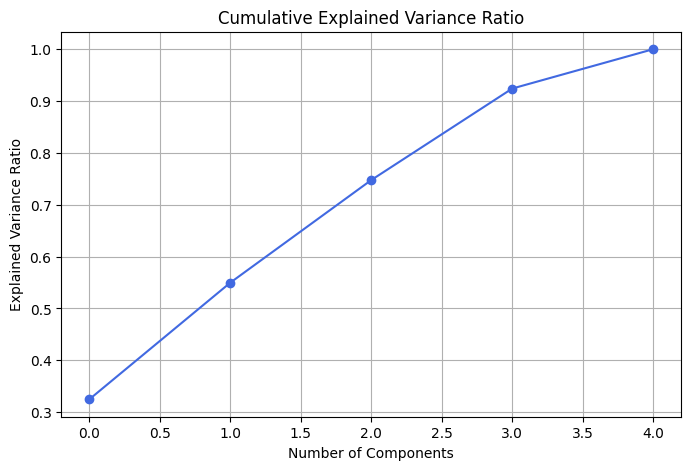

   Principal Component  Cumulative Variation Explained
0                    1                        0.324942
1                    2                        0.549847
2                    3                        0.747663
3                    4                        0.924112
4                    5                        1.000000


In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = PCR_model1.named_steps['pca'].explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='royalblue')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

cvr_df=pd.DataFrame({"Principal Component":range(1,len(explained_variance_ratio)+1),"Cumulative Variation Explained":np.cumsum(explained_variance_ratio)})
print(cvr_df)

In [ ]:
y_pred_test = PCR_model1.predict(X_test[quants])
y_pred_train =PCR_model1.predict(X_train[quants])

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("PCR only for numerical variables:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

PCR only for numerical variables:
R2 Score (Test): 0.2249
R2 Score (Train): 0.3232
RMSE (Test): 73.2026
RMSE (Train):73.3540




In [ ]:
#2. PLSR
from sklearn.cross_decomposition import PLSRegression

plsr = PLSRegression()

linear_reg = LinearRegression()

pipeline_plsr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('plsr', plsr),
])

PLSR_model = pipeline_plsr.fit(X_train, y_train)

PLSR_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('plsr', PLSRegression())])

In [ ]:
y_pred_test = PLSR_model.predict(X_test)
y_pred_train =PLSR_model.predict(X_train)

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("PLSR:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

PLSR:
R2 Score (Test): 0.2433
R2 Score (Train): 0.3206
RMSE (Test): 72.3279
RMSE (Train):73.4953




**With tuning models**
1.   PCR
2.   PLSR



In [ ]:
#1. PCR
pca_tuned = PCA()

linear_reg = LinearRegression()

pipeline_pcr = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca_tuned),('regressor', linear_reg) ])

pcr_param_grid = {
    'pca__n_components': [1,2,3,4,5]
}

pcr_grid_search = GridSearchCV(pipeline_pcr, pcr_param_grid, cv=5)

pcr_grid_search.fit(X_train[quants], y_train)

best_pcr_model = pcr_grid_search.best_estimator_

optimal_components = pcr_grid_search.best_params_['pca__n_components']
print("Optimal number of components:", optimal_components)

Optimal number of components: 5


In [ ]:
y_pred_test = best_pcr_model.predict(X_test[quants])
y_pred_train =best_pcr_model.predict(X_train[quants])

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("PCR only for numerical variables:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

PCR only for numerical variables:
R2 Score (Test): 0.2249
R2 Score (Train): 0.3232
RMSE (Test): 73.2026
RMSE (Train):73.3540




In [ ]:
#2. PLSR
plsr = PLSRegression()

pipeline_plsr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('plsr', plsr)
])

param_grid = {
    'plsr__n_components': [1,2, 3, 4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(estimator=pipeline_plsr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_plsr_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'plsr__n_components': 8}


In [ ]:
y_pred_test =best_plsr_model.predict(X_test)
y_pred_train =best_plsr_model.predict(X_train)

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("PCR only for numerical variables:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

PCR only for numerical variables:
R2 Score (Test): 0.2310
R2 Score (Train): 0.3261
RMSE (Test): 72.9156
RMSE (Train):73.1967




# **Multiple Linear Regression**

In [ ]:
#Without feature selection
'''from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression(fit_intercept=False))])

MLR_model = pipeline.fit(X_train, y_train)

MLR_model'''

"from sklearn.linear_model import LinearRegression\n\npipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression(fit_intercept=False))])\n\nMLR_model = pipeline.fit(X_train, y_train)\n\nMLR_model"

**Forward Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import FeatureUnion

feature_selection = SelectKBest(score_func=f_regression, k=10)

# Create a pipeline combining the preprocessor and the feature selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('regressor', LinearRegression(fit_intercept=False))
])

MLR_model1 = pipeline.fit(X_train, y_train)

MLR_model1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x7f2f4146d510>)),
                ('regressor', LinearRegression(fit_intercept=False))])

Forward selection- Model parameters

In [ ]:
y_pred_test = MLR_model1.predict(X_test)
y_pred_train = MLR_model1.predict(X_train)

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("MLR Model-Forward Selection:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


MLR Model-Forward Selection:
R2 Score (Test): 0.1624
R2 Score (Train): 0.2027
RMSE (Test): 76.0965
RMSE (Train):79.6219




Assumption Checking

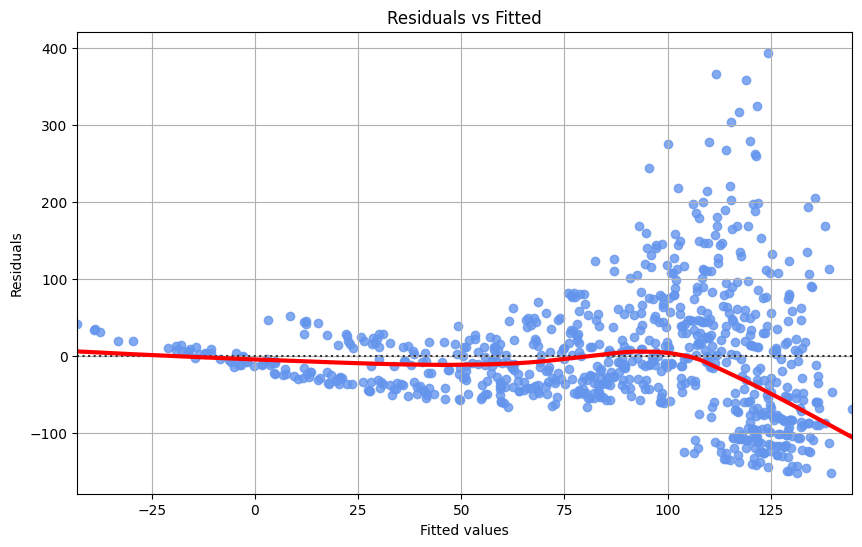

In [ ]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make predictions
y_pred_train = MLR_model1.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred_train

# Assumption 1: Linearity
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_train, y=residuals, color='cornflowerblue', lowess=True, line_kws={'color': 'red', 'lw': 3})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


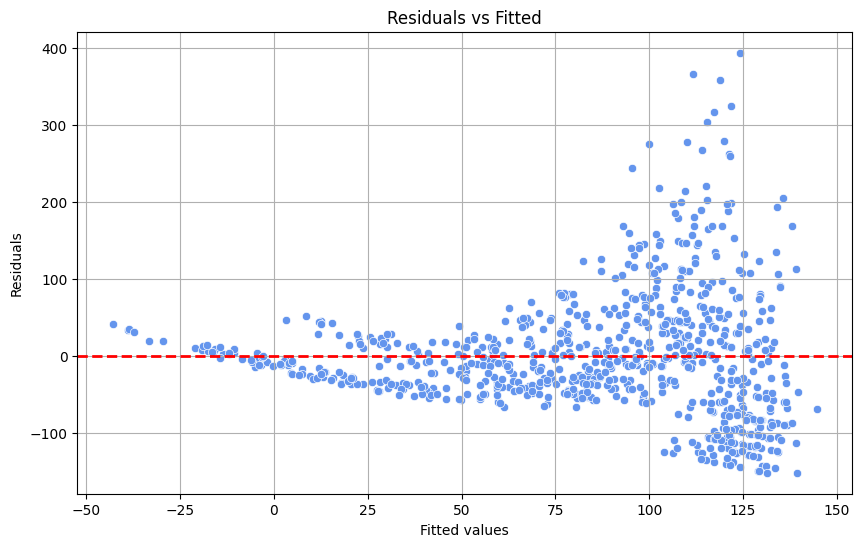

In [ ]:
# Assumption 2: Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train, y=residuals, color='cornflowerblue')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()


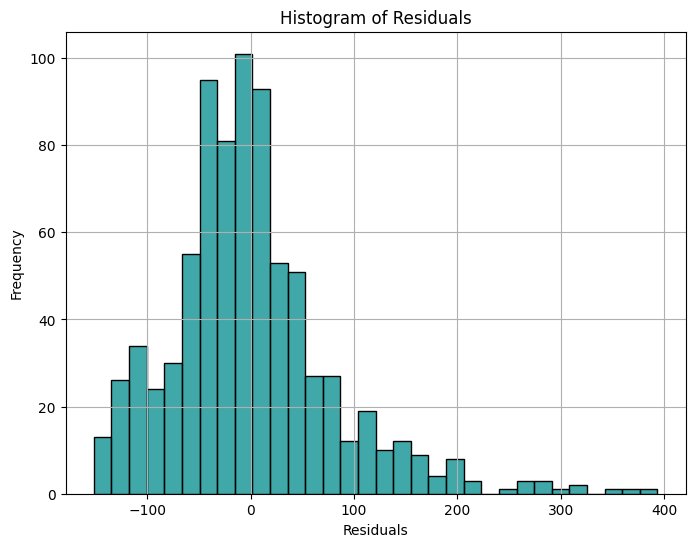

In [ ]:
# Assumption 3: Normality of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, color='darkcyan')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

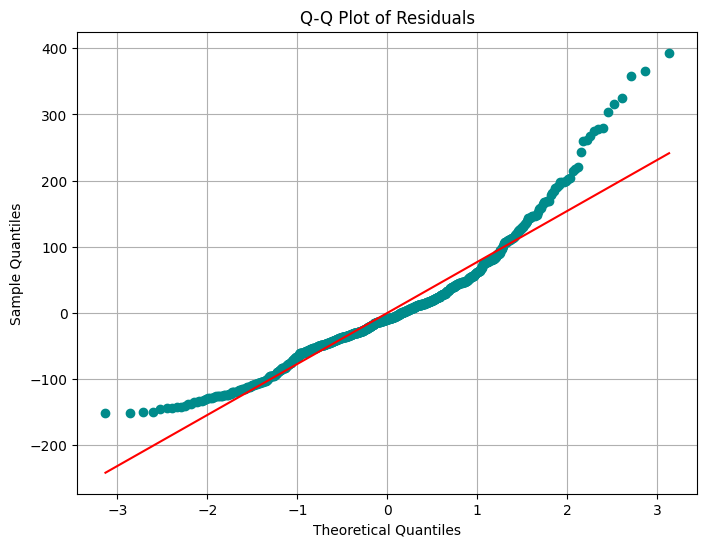

In [ ]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.gca().get_lines()[0].set_color('darkcyan')  # Change color of the line
plt.gca().get_lines()[1].set_markerfacecolor('red')
plt.grid(True)
plt.show()

In [ ]:
# Assumption 4: Multicollinearity (VIF Calculation)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train[quants].columns
vif_data["VIF"] = [variance_inflation_factor(X_train[quants].values, i) for i in range(len(X_train[quants].columns))]
print(vif_data)

                  Feature        VIF
0        Number_of_Riders  11.699414
1       Number_of_Drivers   4.913899
2    Number_of_Past_Rides   3.740849
3         Average_Ratings  12.052685
4  Expected_Ride_Duration   4.914361


**Backward Selection**

In [ ]:
from sklearn.feature_selection import RFE

feature_selection = RFE(estimator=linear_reg, n_features_to_select=10, step=1, verbose=0)

# Create a pipeline combining the preprocessor and the feature selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('regressor',LinearRegression(fit_intercept=False))
])

# Fit the pipeline
MLR_model2 = pipeline.fit(X_train, y_train)

MLR_model2


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('feature_selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=10)),
                ('regressor', LinearRegression(fit_intercept=False))])

Backward Elimination- Model parameters

In [ ]:
y_pred_test = MLR_model2.predict(X_test)
y_pred_train = MLR_model2.predict(X_train)

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("MLR Model-Backward Elimination:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


#Did not perform assumption checking as forward selection performs better that backward elimination.

MLR Model-Backward Elimination:
R2 Score (Test): 0.0618
R2 Score (Train): 0.1976
RMSE (Test): 80.5357
RMSE (Train):79.8740




In [ ]:
#--------------------------------------------------------------------------------End--------------------------------------------------------------------------------

# **Factor Analysis**

Without tuning

In [ ]:
from sklearn.decomposition import FactorAnalysis

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('factor_analysis', FactorAnalysis(n_components=2)),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print("Factor Analysis + Linear Regression Model:")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print("RMSE (Test):", np.sqrt(mse_test))
print("RMSE (Train):", np.sqrt(mse_train))

Factor Analysis + Linear Regression Model:
R2 Score (Test): 0.0667
R2 Score (Train): 0.0792
RMSE (Test): 80.3282280737522
RMSE (Train): 85.56497393663575


With tuning

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('factor_analysis', FactorAnalysis()),
    ('regressor', LinearRegression())
])

param_grid = {
    'factor_analysis__n_components': [1,2,3,4,5,6,7,8,9]
}

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'factor_analysis__n_components': 9}
